# Final Project - Classifying Houses into Different Price Range using Neural Network and Tree Classifiers from American Housing Survey 2017 Dataset

__The main goal of this project is to predict the range of selling price of house with a high degree of predictive accuracy using various Machine Learning methods. Given house sale data or explanatory variable such as number of bedrooms, number of bathrooms in unit, housing cost, annual commuting cost etc, we build our model. Next, the model is evaluated with respect to test data, and plot the prediction and coefficients.__

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import argmax
import re
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
import math
from subprocess import call
from IPython.display import Image
from IPython.display import display
import warnings; warnings.simplefilter('ignore')
import copy

# Learning Libraries
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold

# Dataset
__We are using American Housing Survey 2017 data https://www.census.gov/programs-surveys/ahs/data/2017/ahs-2017-public-use-file--puf-/ahs-2017-national-public-use-file--puf-.html (household.csv in AHS 2017 National PUF v3.0 CSV.zip). There is another csv file called AHSDICT_15NOV19_21_17_31_97_S.csv that consist of the mapping information of each feature name to their actual meaning and data type information.__

In [2]:
# Loading the dataset
data = pd.read_csv("household.csv")
headings = pd.read_csv("AHSDICT_15NOV19_21_17_31_97_S.csv", encoding = "ISO-8859-1")

In [3]:
data.head()

,CONTROL,TOTROOMS,PERPOVLVL,COMTYPE,COMCOST,JACPRIMARY,JACSECNDRY,JADEQUACY,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JBIKE,JBLD,JBUS,JCARPOOL,JCELLPHONE,JCOLD,JCOLDCOST,JCOLDEQ,JCOLDEQFREQ,JCOLDHTCAP,JCOLDINSUL,JCOLDOTHER,JCOLDUTIL,JCOMCOST,JCOMDAYS,JCOMPANYCAR,JCOMTYPE,JCONDO,JCOOKFUEL,JCOOKTYPE,JDBEVICLK,JDBEVICNOTE,JDBEVICTHT,JDBEVICWHERE,JDBFORCWHR,JDBLVEFORC,JDBMISSMORT,JDBMISSRENT,JDBUTBILL,JDINING,JDISHH,JDISHWASH,JDIST,JDPALTCOM,JDPDRFOOD,JDPEMWATER,JDPEVACPETS,JDPEVFIN,JDPEVINFO,JDPEVKIT,JDPEVLOC,JDPEVSEP,JDPEVVEHIC,JDPFLDINS,JDPGENERT,JDPGETINFO,JDPMAJDIS,JDPSHELTR,JDRIVEALL,JDRIVEPART,JDRYER,JDWNPAYPCT,JELECAMT,JENTRYSYS,JFERRY,JFINCP,JFINROOMS,JFIREPLACE,JFIRSTHOME,JFLOORHOLE,JFNDCRUMB,JFOUNDTYPE,JFRIDGE,JFS,JFUSEBLOW,JGARAGE,JGASAMT,JGRANDHH,JGUTREHB,JHEATFUEL,JHEATTYPE,JHHADLTKIDS,JHHAGE,JHHCARE,JHHCITSHP,JHHENROLL,JHHERRND,JHHGRAD,JHHHEAR,JHHINUSYR,JHHMAR,JHHMEMRY,JHHMOVE,JHHNATVTY,JHHOLDKIDS,JHHRACE,JHHRACEAS,JHHRACEPI,JHHSEE,JHHSEX,JHHSPAN,JHHWALK,JHHYNGKIDS,JHINCP,JHMRACCESS,JHMRENEFF,JHMRSALE,JHOA,JHOAAMT,JHOTWATER,JHOWBUY,JHRATE,JHSHLDTYPE,JHUDSUB,JINSURAMT,JKITCHENS,JKITCHSINK,JKITEXCLU,JLAUNDY,JLEADINSP,JLEAKI,JLEAKIDK,JLEAKIOTH,JLEAKIPIPE,JLEAKIPLUM,JLEAKIWATH,JLEAKO,JLEAKOBASE,JLEAKOOTH,JLEAKOROOF,JLEAKOWALL,JLOTAMT,JLOTSIZE,JMAINTAMT,JMARKETVAL,JMGRONSITE,JMHANCHOR,JMHMOVE,JMHWIDE,JMILHH,JMOLDBASEM,JMOLDBATH,JMOLDBEDRM,JMOLDKITCH,JMOLDLROOM,JMOLDOTHER,JMONLSTOCC,JMONOXIDE,JMORTAMT,JMOVFORCE,JMOVWHY,JMULTIGEN,JMVG1COST,JMVG1LOC,JMVG1PER,JMVG1STAT,JMVG1TEN,JMVG1TYPE,JMVG2COST,JMVG2LOC,JMVG2PER,JMVG2STAT,JMVG2TEN,JMVG2TYPE,JMVG3COST,JMVG3LOC,JMVG3PER,JMVG3STAT,JMVG3TEN,JMVG3TYPE,JNEARABAND,JNEARBARCL,JNEARTRASH,JNHQPCRIME,JNHQPUBTRN,JNHQRISK,JNHQSCHOOL,JNHQSCRIME,JNORC,JNOSTEP,JNOTOIL,JNOTOILFREQ,JNOWAT,JNOWATFREQ,JNOWIRE,JNRATE,JNUMADULTS,JNUMCARE,JNUMELDERS,JNUMERRND,JNUMHEAR,JNUMMEMRY,JNUMNONREL,JNUMOLDKIDS,JNUMPEOPLE,JNUMSECFAM,JNUMSEE,JNUMSUBFAM,JNUMVETS,JNUMWALK,JNUMYNGKIDS,JOCCAPRIL,JOCCAUGUST,JOCCDECEM,JOCCFEBRU,JOCCJANUR,JOCCJULY,JOCCJUNE,JOCCMARCH,JOCCMAY,JOCCNOVEM,JOCCOCTOB,JOCCSEPTEM,JOCCYRRND,JOILAMT,JOTHERAMT,JOWNLOT,JPAINTPEEL,JPARKING,JPARTNER,JPERMNEAR,JPERPOVLVL,JPLUGS,JPOOLAMT,JPORCH,JPOVLVLINC,JPROTAXAMT,JRATINGHS,JRATINGNH,JREMODAMT,JREMODJOBS,JRENT,JRENTCNTRL,JRENTSUB,JRMCHANGE,JRMCOMMUTE,JRMCOSTS,JRMFAMILY,JRMHOME,JRMHOOD,JRMJOB,JRMOTHER,JRMOWNHH,JROACH,JRODENT,JROOFHOLE,JROOFSAG,JROOFSHIN,JSEARCHFAM,JSEARCHLIST,JSEARCHNET,JSEARCHOTH,JSEARCHPUB,JSEARCHREA,JSEARCHSIGN,JSEARCHSTOP,JSEWBREAK,JSEWTYPE,JSEWUSERS,JSOLAR,JSTORIES,JSUBDIV,JSUBSIDY,JSUBWAY,JSUITYRRND,JSUPP1HEAT,JSUPP2HEAT,JTAXI,JTENURE,JTIMESHARE,JTOLL,JTOTBALAMT,JTOTHCAMT,JTOTROOMS,JTRANAMT,JTRASHAMT,JUFINROOMS,JUNITFLOORS,JUNITSIZE,JUPKEEP,JUTILAMT,JVACANCY,JVACINHER,JVACINVEST,JVACMONTHS,JVACOTH,JVACPRIRES,JVACREC,JVACRESDAYS,JVACRNTDAYS,JVACSELL,JVAN,JWALK,JWALLCRACK,JWALLSIDE,JWALLSLOPE,JWASHER,JWATERAMT,JWATSOURCE,JWINBARS,JWINBOARD,JWINBROKE,JYRBUILT,DBEVICLK,DBEVICNOTE,DBEVICTHT,DBFORCWHR,DBLVEFORC,RENT,BATHEXCLU,DISHWASH,SOLAR,GARAGE,DINING,LAUNDY,STORIES,NOSTEP,GUTREHB,CONDO,SEARCHFAM,SEARCHLIST,SEARCHNET,SEARCHOTH,SEARCHPUB,SEARCHREA,SEARCHSIGN,RMCHANGE,RMCOMMUTE,RMCOSTS,RMFAMILY,RMHOME,RMHOOD,RMJOB,RMOWNHH,RMOTHER,HMRACCESS,HMRENEFF,HMRSALE,BIKE,WALK,TRANAMT,COMDAYS,DIST,POOLAMT,RATINGHS,RATINGNH,NHQPCRIME,NHQPUBTRN,NHQRISK,NHQSCHOOL,NHQSCRIME,NORC,SUBDIV,NOWIRE,TENURE,MHWIDE,PLUGS,CELLPHONE,PORCH,LEAKO,LEAKI,NOTOIL,PAINTPEEL,HOWBUY,OCCJANUR,OCCFEBRU,OCCMARCH,OCCAPRIL,OCCMAY,OCCJUNE,OCCJULY,OCCAUGUST,OCCSEPTEM,OCCOCTOB,OCCNOVEM,OCCDECEM,OCCYRRND,LEADINSP,MONLSTOCC,SUITYRRND,TIMESHARE,VACRESDAYS,VACRNTDAYS,PERMNEAR,VACPRIRES,VACREC,VACINVEST,VACSELL,VACINHER,VACOTH,OWNLOT,RENTCNTRL,RENTSUB,NEARABAND,NEARBARCL,NEARTRASH,BUS,SUBWAY,VAN,DBMISSMORT,DBMISSRENT,DBUTBILL,DBEVICWHERE,INTLANG,DIVISION,OMB13CBSA,WEIGHT,SP1WEIGHT,SP2WEIGHT,INTMODE,INTSTATUS,INTMONTH,BLD,ENTRYSYS,HHSEX,HHMAR,HHSPAN,HHCITSHP,MILHH,HHAGE,HHMOVE,HHINUSYR,HHRACE,HHRACEAS,HHRACEPI,HHGRAD,HHNATVTY,HHENROLL,PARTNER,HSHLDTYPE,SAMEHHLD,NUMELDERS,NUMADULTS,NUMN

# Data Cleaning

In [4]:
# Converting dataset into a format that can be processed further
col_to_check = data.columns
data[col_to_check] = data[col_to_check].replace({'\'':''}, regex=True)

In [5]:
# The column CONTROL is not relevant to our problem, and all values of JRENT is NaN, so we can remove that 
col_to_remo = ['CONTROL','JRENT']
data = data.drop(col_to_remo, axis = 1)

In [6]:
# Replace all Not Applicable/No Response values with Nan for further processing
L = ['-6', -6, '-9', -9, 'M', 'N']
data = data.replace(L, np.nan)

In [7]:
# Getting rid of non relevant values
for c in list(data.columns): 
    nan = (len(data) - data[c].count())/(len(data))
    if nan >= 0.85:
        del data[c]
print(data.shape)

(66752, 534)


In [8]:
# Target column
data['MARKETVAL'].describe()

count    3.995100e+04
mean     3.382110e+05
std      5.246493e+05
min      1.000000e+00
25%      1.210225e+05
50%      2.265120e+05
75%      3.958310e+05
max      9.999998e+06
Name: MARKETVAL, dtype: float64

In [9]:
data = data[pd.notnull(data['MARKETVAL'])]

In [10]:
indexNames = data[ data['MARKETVAL'] < 50000 ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

(array([2.323e+04, 8.323e+03, 2.557e+03, 1.060e+03, 3.870e+02, 2.360e+02,
        1.350e+02, 9.000e+01, 6.700e+01, 4.900e+01, 4.300e+01, 2.200e+01,
        1.700e+01, 1.200e+01, 1.900e+01, 1.100e+01, 8.000e+00, 1.000e+01,
        9.000e+00, 1.000e+00, 0.000e+00, 5.000e+00, 5.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 7.000e+00, 3.100e+01]),
 array([  50001.        ,  326389.80555556,  602778.61111111,
         879167.41666667, 1155556.22222222, 1431945.02777778,
        1708333.83333333, 1984722.63888889, 2261111.44444444,
        2537500.25      , 2813889.05555556, 3090277.86111111,
        3366666.66666667, 3643055.47222222, 3919444.27777778,
        4195833.08333333, 4472221.88888889, 4748610.69444444,
        5024999.5       , 5301388.30555556, 5577777.11111111,
        5854165.91666667, 6130554.72222222, 6406943.52777778,
        6683332.33333333, 6959721.13888889, 7236109.944444

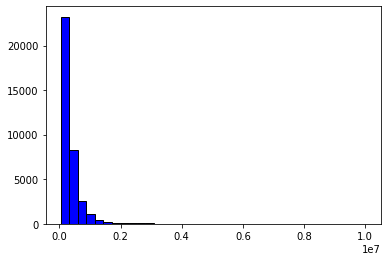

In [11]:
# Checking distribution of data
plt.hist(data['MARKETVAL'], bins = int(180/5), color = 'blue', edgecolor = 'black')

In [12]:
# Dividing the dataset into numerical and categorical features
col_o = list(data.columns)
numeric = []
categorical = []
e = []
for c in col_o:
    j = 0
    if c[0]=='J':
        j = 1
        c = c[1:]
    h = headings.loc[headings['Variable']== c]['TYPE'].tolist()
    if h != []:
        if (h[0] == 'Character'):
            if j == 0:
                categorical.append(c)
            elif j == 1:
                categorical.append('J' + c)
        elif (h[0] == 'Numeric'):
            if j == 0:
                numeric.append(c)
            elif j == 1:
                numeric.append('J' + c)
        else:
            if j == 0:
                e.append(c)
            elif j == 1:
                e.append('J' + c)
print(numeric)
print(categorical)
print(e)

['TOTROOMS', 'PERPOVLVL', 'COMCOST', 'JBEDROOMS', 'JCARPOOL', 'JCELLPHONE', 'JCOLDEQFREQ', 'JCOMCOST', 'JCOMDAYS', 'JDINING', 'JDIST', 'JDRIVEALL', 'JDWNPAYPCT', 'JELECAMT', 'JFERRY', 'JFINCP', 'JFINROOMS', 'JGASAMT', 'JHHADLTKIDS', 'JHHAGE', 'JHHINUSYR', 'JHHMOVE', 'JHHOLDKIDS', 'JHHYNGKIDS', 'JHINCP', 'JHOAAMT', 'JINSURAMT', 'JKITCHENS', 'JLAUNDY', 'JLOTAMT', 'JMAINTAMT', 'JMARKETVAL', 'JMONLSTOCC', 'JMORTAMT', 'JMVG1PER', 'JMVG2PER', 'JMVG3PER', 'JNOTOILFREQ', 'JNUMADULTS', 'JNUMELDERS', 'JNUMNONREL', 'JNUMOLDKIDS', 'JNUMPEOPLE', 'JNUMSECFAM', 'JNUMSUBFAM', 'JNUMVETS', 'JNUMYNGKIDS', 'JOILAMT', 'JOTHERAMT', 'JPARKING', 'JPERPOVLVL', 'JPOOLAMT', 'JPOVLVLINC', 'JPROTAXAMT', 'JRATINGHS', 'JRATINGNH', 'JREMODAMT', 'JREMODJOBS', 'JSTORIES', 'JTAXI', 'JTOLL', 'JTOTBALAMT', 'JTOTHCAMT', 'JTOTROOMS', 'JTRANAMT', 'JTRASHAMT', 'JUFINROOMS', 'JUNITFLOORS', 'JUTILAMT', 'JVACMONTHS', 'JWATERAMT', 'JYRBUILT', 'RENT', 'DINING', 'LAUNDY', 'STORIES', 'COMDAYS', 'DIST', 'RATINGHS', 'RATINGNH', 'CELLP

In [13]:
# There are null values in many columns which require cleaning
print(data.isnull().sum())

TOTROOMS            0
PERPOVLVL        4422
COMTYPE         27528
COMCOST         28629
JACPRIMARY          0
JACSECNDRY          0
JADEQUACY           0
JBATHEXCLU          0
JBATHROOMS          0
JBEDROOMS           0
JBIKE               0
JBLD                0
JBUS                0
JCARPOOL            0
JCELLPHONE          0
JCOLD               0
JCOLDCOST           0
JCOLDEQ             0
JCOLDEQFREQ         0
JCOLDHTCAP          0
JCOLDINSUL          0
JCOLDOTHER          0
JCOLDUTIL           0
JCOMCOST            0
JCOMDAYS            0
JCOMPANYCAR         0
JCOMTYPE            0
JCONDO              0
JCOOKFUEL           0
JCOOKTYPE           0
JDBEVICLK           0
JDBEVICNOTE         0
JDBEVICTHT          0
JDBEVICWHERE        0
JDBFORCWHR          0
JDBLVEFORC          0
JDBMISSMORT         0
JDBMISSRENT         0
JDBUTBILL           0
JDINING             0
JDISHH              0
JDISHWASH           0
JDIST               0
JDPALTCOM           0
JDPDRFOOD           0
JDPEMWATER

In [14]:
# Defining data_numeric which only has numerical features
data_numeric = data.drop(categorical, axis = 1)

In [15]:
# Null value for Numeric Columns
print(data_numeric.isnull().sum())

TOTROOMS           0
PERPOVLVL       4422
COMCOST        28629
JBEDROOMS          0
JCARPOOL           0
JCELLPHONE         0
JCOLDEQFREQ        0
JCOMCOST           0
JCOMDAYS           0
JDINING            0
JDIST              0
JDRIVEALL          0
JDWNPAYPCT         0
JELECAMT           0
JFERRY             0
JFINCP             0
JFINROOMS          0
JGASAMT            0
JHHADLTKIDS        0
JHHAGE             0
JHHINUSYR          0
JHHMOVE            0
JHHOLDKIDS         0
JHHYNGKIDS         0
JHINCP             0
JHOAAMT            0
JINSURAMT          0
JKITCHENS          0
JLAUNDY            0
JLOTAMT            0
JMAINTAMT          0
JMARKETVAL         0
JMONLSTOCC         0
JMORTAMT           0
JMVG1PER           0
JMVG2PER           0
JMVG3PER           0
JNOTOILFREQ        0
JNUMADULTS         0
JNUMELDERS         0
JNUMNONREL         0
JNUMOLDKIDS        0
JNUMPEOPLE         0
JNUMSECFAM         0
JNUMSUBFAM         0
JNUMVETS           0
JNUMYNGKIDS        0
JOILAMT      

In [16]:
# Getting rid of all NaN entries in data_numeric
data_numeric = data_numeric.fillna(data_numeric.mean())
for i in numeric:
    if math.isnan(float(data_numeric[i].mean())):
        # drop the unnecessary columns
        print("Dropping the Column: ", i)
        data_numeric = data_numeric.drop(i, axis = 1)
    else:
        data_numeric[i] = data_numeric[i].fillna(data_numeric[i].mean())

data_numeric.head()
print(data_numeric.isnull().sum())

Dropping the Column:  RENT
TOTROOMS       0
PERPOVLVL      0
COMCOST        0
JBEDROOMS      0
JCARPOOL       0
JCELLPHONE     0
JCOLDEQFREQ    0
JCOMCOST       0
JCOMDAYS       0
JDINING        0
JDIST          0
JDRIVEALL      0
JDWNPAYPCT     0
JELECAMT       0
JFERRY         0
JFINCP         0
JFINROOMS      0
JGASAMT        0
JHHADLTKIDS    0
JHHAGE         0
JHHINUSYR      0
JHHMOVE        0
JHHOLDKIDS     0
JHHYNGKIDS     0
JHINCP         0
JHOAAMT        0
JINSURAMT      0
JKITCHENS      0
JLAUNDY        0
JLOTAMT        0
JMAINTAMT      0
JMARKETVAL     0
JMONLSTOCC     0
JMORTAMT       0
JMVG1PER       0
JMVG2PER       0
JMVG3PER       0
JNOTOILFREQ    0
JNUMADULTS     0
JNUMELDERS     0
JNUMNONREL     0
JNUMOLDKIDS    0
JNUMPEOPLE     0
JNUMSECFAM     0
JNUMSUBFAM     0
JNUMVETS       0
JNUMYNGKIDS    0
JOILAMT        0
JOTHERAMT      0
JPARKING       0
JPERPOVLVL     0
JPOOLAMT       0
JPOVLVLINC     0
JPROTAXAMT     0
JRATINGHS      0
JRATINGNH      0
JREMODAMT      0
JREM

In [17]:
# Defining data_categorical which only has categorical features
data_categorical = data.drop(numeric, axis = 1)

In [18]:
# Null value for Categorical Columns
print(data_categorical.isnull().sum())

COMTYPE         27528
JACPRIMARY          0
JACSECNDRY          0
JADEQUACY           0
JBATHEXCLU          0
JBATHROOMS          0
JBIKE               0
JBLD                0
JBUS                0
JCOLD               0
JCOLDCOST           0
JCOLDEQ             0
JCOLDHTCAP          0
JCOLDINSUL          0
JCOLDOTHER          0
JCOLDUTIL           0
JCOMPANYCAR         0
JCOMTYPE            0
JCONDO              0
JCOOKFUEL           0
JCOOKTYPE           0
JDBEVICLK           0
JDBEVICNOTE         0
JDBEVICTHT          0
JDBEVICWHERE        0
JDBFORCWHR          0
JDBLVEFORC          0
JDBMISSMORT         0
JDBMISSRENT         0
JDBUTBILL           0
JDISHH              0
JDISHWASH           0
JDPALTCOM           0
JDPDRFOOD           0
JDPEMWATER          0
JDPEVACPETS         0
JDPEVFIN            0
JDPEVINFO           0
JDPEVKIT            0
JDPEVLOC            0
JDPEVSEP            0
JDPEVVEHIC          0
JDPFLDINS           0
JDPGENERT           0
JDPGETINFO          0
JDPMAJDIS 

In [19]:
# Getting rid of all NaN entries in data_catagorical
for i in categorical:
    # dict to store counts of each unique value occurring for each feature
    freq = {}
    for j in data_categorical[i]:
        if (j in freq): 
            freq[j] += 1
        else: 
            freq[j] = 1
    freq_sorted = sorted(freq, key=freq.get, reverse=True)
    
    # if the most frequent value is Nan
    if math.isnan(float(freq_sorted[0])):
        # if Nan is not the only value for that feature, then use the next most frequent value to replace Nan
        if len(freq_sorted) > 1:
            mode_val = freq_sorted[1]
            data_categorical[i] = data_categorical[i].fillna(mode_val)
        # if Nan is the only value for that feature, then drop the column
        else: 
            # drop the unnecessary columns
            print("Dropping the Column: ", i)
            data_categorical = data_categorical.drop(i, axis = 1)
    else:
        mode_val = freq_sorted[0]
        data_categorical[i] = data_categorical[i].fillna(mode_val)
        
print(data_categorical.isnull().sum())

Dropping the Column:  DBEVICLK
Dropping the Column:  DBEVICTHT
Dropping the Column:  RENTSUB
Dropping the Column:  DBMISSRENT
Dropping the Column:  DBEVICWHERE
Dropping the Column:  MGRONSITE
Dropping the Column:  HUDSUB
COMTYPE         0
JACPRIMARY      0
JACSECNDRY      0
JADEQUACY       0
JBATHEXCLU      0
JBATHROOMS      0
JBIKE           0
JBLD            0
JBUS            0
JCOLD           0
JCOLDCOST       0
JCOLDEQ         0
JCOLDHTCAP      0
JCOLDINSUL      0
JCOLDOTHER      0
JCOLDUTIL       0
JCOMPANYCAR     0
JCOMTYPE        0
JCONDO          0
JCOOKFUEL       0
JCOOKTYPE       0
JDBEVICLK       0
JDBEVICNOTE     0
JDBEVICTHT      0
JDBEVICWHERE    0
JDBFORCWHR      0
JDBLVEFORC      0
JDBMISSMORT     0
JDBMISSRENT     0
JDBUTBILL       0
JDISHH          0
JDISHWASH       0
JDPALTCOM       0
JDPDRFOOD       0
JDPEMWATER      0
JDPEVACPETS     0
JDPEVFIN        0
JDPEVINFO       0
JDPEVKIT        0
JDPEVLOC        0
JDPEVSEP        0
JDPEVVEHIC      0
JDPFLDINS       0
JDPGE

In [20]:
# Concatenate numerical and categorical data
clean_data = pd.concat([data_numeric, data_categorical], axis=1, sort=False)
clean_data.head()

,TOTROOMS,PERPOVLVL,COMCOST,JBEDROOMS,JCARPOOL,JCELLPHONE,JCOLDEQFREQ,JCOMCOST,JCOMDAYS,JDINING,JDIST,JDRIVEALL,JDWNPAYPCT,JELECAMT,JFERRY,JFINCP,JFINROOMS,JGASAMT,JHHADLTKIDS,JHHAGE,JHHINUSYR,JHHMOVE,JHHOLDKIDS,JHHYNGKIDS,JHINCP,JHOAAMT,JINSURAMT,JKITCHENS,JLAUNDY,JLOTAMT,JMAINTAMT,JMARKETVAL,JMONLSTOCC,JMORTAMT,JMVG1PER,JMVG2PER,JMVG3PER,JNOTOILFREQ,JNUMADULTS,JNUMELDERS,JNUMNONREL,JNUMOLDKIDS,JNUMPEOPLE,JNUMSECFAM,JNUMSUBFAM,JNUMVETS,JNUMYNGKIDS,JOILAMT,JOTHERAMT,JPARKING,JPERPOVLVL,JPOOLAMT,JPOVLVLINC,JPROTAXAMT,JRATINGHS,JRATINGNH,JREMODAMT,JREMODJOBS,JSTORIES,JTAXI,JTOLL,JTOTBALAMT,JTOTHCAMT,JTOTROOMS,JTRANAMT,JTRASHAMT,JUFINROOMS,JUNITFLOORS,JUTILAMT,JVACMONTHS,JWATERAMT,JYRBUILT,DINING,LAUNDY,STORIES,COMDAYS,DIST,RATINGHS,RATINGNH,CELLPHONE,WEIGHT,SP1WEIGHT,SP2WEIGHT,HHAGE,HHMOVE,HHINUSYR,NUMELDERS,NUMADULTS,NUMNONREL,HHYNGKIDS,HHOLDKIDS,NUMVETS,NUMYNGKIDS,NUMOLDKIDS,NUMSUBFAM,NUMSECFAM,NUMPEOPLE,HHADLTKIDS,UFINROOMS,FINROOMS,YRBUILT,UNITFLOORS,BEDROOMS,KITCHENS,DWNPAYPCT,ELECAMT,GASAMT,OILAMT,OTHERAMT,TRASHAMT,WATERAMT,UTILAMT,REMODJOBS,MVG1PER,CARPOOL,TAXI,FERRY,DRIVEALL,PARKING,TOLL,POVLVLINC,MARKETVAL,TOTBALAMT,PROTAXAMT,INSURAMT,HOAAMT,MAINTAMT,MORTAMT,HINCP,FINCP,REMODAMT,TOTHCAMT,COMTYPE,JACPRIMARY,JACSECNDRY,JADEQUACY,JBATHEXCLU,JBATHROOMS,JBIKE,JBLD,JBUS,JCOLD,JCOLDCOST,JCOLDEQ,JCOLDHTCAP,JCOLDINSUL,JCOLDOTHER,JCOLDUTIL,JCOMPANYCAR,JCOMTYPE,JCONDO,JCOOKFUEL,JCOOKTYPE,JDBEVICLK,JDBEVICNOTE,JDBEVICTHT,JDBEVICWHERE,JDBFORCWHR,JDBLVEFORC,JDBMISSMORT,JDBMISSRENT,JDBUTBILL,JDISHH,JDISHWASH,JDPALTCOM,JDPDRFOOD,JDPEMWATER,JDPEVACPETS,JDPEVFIN,JDPEVINFO,JDPEVKIT,JDPEVLOC,JDPEVSEP,JDPEVVEHIC,JDPFLDINS,JDPGENERT,JDPGETINFO,JDPMAJDIS,JDPSHELTR,JDRIVEPART,JDRYER,JENTRYSYS,JFIREPLACE,JFIRSTHOME,JFLOORHOLE,JFNDCRUMB,JFOUNDTYPE,JFRIDGE,JFS,JFUSEBLOW,JGARAGE,JGRANDHH,JGUTREHB,JHEATFUEL,JHEATTYPE,JHHCARE,JHHCITSHP,JHHENROLL,JHHERRND,JHHGRAD,JHHHEAR,JHHMAR,JHHMEMRY,JHHNATVTY,JHHRACE,JHHRACEAS,JHHRACEPI,JHHSEE,JHHSEX,JHHSPAN,JHHWALK,JHMRACCESS,JHMRENEFF,JHMRSALE,JHOA,JHOTWATER,JHOWBUY,JHRATE,JHSHLDTYPE,JHUDSUB,JKITCHSINK,JKITEXCLU,JLEADINSP,JLEAKI,JLEAKIDK,JLEAKIOTH,JLEAKIPIPE,JLEAKIPLUM,JLEAKIWATH,JLEAKO,JLEAKOBASE,JLEAKOOTH,JLEAKOROOF,JLEAKOWALL,JLOTSIZE,JMGRONSITE,JMHANCHOR,JMHMOVE,JMHWIDE,JMILHH,JMOLDBASEM,JMOLDBATH,JMOLDBEDRM,JMOLDKITCH,JMOLDLROOM,JMOLDOTHER,JMONOXIDE,JMOVFORCE,JMOVWHY,JMULTIGEN,JMVG1COST,JMVG1LOC,JMVG1STAT,JMVG1TEN,JMVG1TYPE,JMVG2COST,JMVG2LOC,JMVG2STAT,JMVG2TEN,JMVG2TYPE,JMVG3COST,JMVG3LOC,JMVG3STAT,JMVG3TEN,JMVG3TYPE,JNEARABAND,JNEARBARCL,JNEARTRASH,JNHQPCRIME,JNHQPUBTRN,JNHQRISK,JNHQSCHOOL,JNHQSCRIME,JNORC,JNOSTEP,JNOTOIL,JNOWAT,JNOWATFREQ,JNOWIRE,JNRATE,JNUMCARE,JNUMERRND,JNUMHEAR,JNUMMEMRY,JNUMSEE,JNUMWALK,JOCCAPRIL,JOCCAUGUST,JOCCDECEM,JOCCFEBRU,JOCCJANUR,JOCCJULY,JOCCJUNE,JOCCMARCH,JOCCMAY,JOCCNOVEM,JOCCOCTOB,JOCCSEPTEM,JOCCYRRND,JOWNLOT,JPAINTPEEL,JPARTNER,JPERMNEAR,JPLUGS,JPORCH,JRENTCNTRL,JRENTSUB,JRMCHANGE,JRMCOMMUTE,JRMCOSTS,JRMFAMILY,JRMHOME,JRMHOOD,JRMJOB,JRMOTHER,JRMOWNHH,JROACH,JRODENT,JROOFHOLE,JROOFSAG,JROOFSHIN,JSEARCHFAM,JSEARCHLIST,JSEARCHNET,JSEARCHOTH,JSEARCHPUB,JSEARCHREA,JSEARCHSIGN,JSEARCHSTOP,JSEWBREAK,JSEWTYPE,JSEWUSERS,JSOLAR,JSUBDIV,JSUBSIDY,JSUBWAY,JSUITYRRND,JSUPP1HEAT,JSUPP2HEAT,JTENURE,JTIMESHARE,JUNITSIZE,JUPKEEP,JVACANCY,JVACINHER,JVACINVEST,JVACOTH,JVACPRIRES,JVACREC,JVACRESDAYS,JVACRNTDAYS,JVACSELL,JVAN,JWALK,JWALLCRACK,JWALLSIDE,JWALLSLOPE,JWASHER,JWATSOURCE,JWINBARS,JWINBOARD,JWINBROKE,DBFORCWHR,DBLVEFORC,DISHWASH,SOLAR,GARAGE,NOSTEP,GUTREHB,CONDO,SEARCHFAM,SEARCHLIST,SEARCHNET,SEARCHOTH,SEARCHPUB,SEARCHREA,SEARCHSIGN,RMCHANGE,RMCOMMUTE,RMCOSTS,RMFAMILY,RMHOME,RMHOOD,RMJOB,RMOWNHH,RMOTHER,HMRACCESS,HMRENEFF,HMRSALE,BIKE,WALK,NHQPCRIME,NHQPUBTRN,NHQRISK,NHQSCHOOL,NHQSCRIME,NORC,SUBDIV,NOWIRE,TENURE,PLUGS,PORCH,LEAKO,LEAKI,NOTOIL,PAINTPEEL,HOWBUY,LEADINSP,OWNLOT,NEARABAND,NEARBARCL,NEARTRASH,BUS,SUBWAY,VAN,DBMISSMORT,DBUTBILL,INTLANG,DIVISION,OMB13CBSA,INTMODE,INTSTATUS,INTMONTH,BLD,ENTRYSYS,HHSEX,HHMAR,HHSPAN,HHCITSHP,MILHH,HHRACE,HHGRAD,HHNATVTY,HHENROLL,PARTNER,HSHLD

In [21]:
clean_data.describe()

,TOTROOMS,PERPOVLVL,COMCOST,DINING,LAUNDY,STORIES,COMDAYS,DIST,RATINGHS,RATINGNH,CELLPHONE,WEIGHT,SP1WEIGHT,SP2WEIGHT,HHAGE,HHMOVE,HHINUSYR,NUMELDERS,NUMADULTS,NUMNONREL,HHYNGKIDS,HHOLDKIDS,NUMVETS,NUMYNGKIDS,NUMOLDKIDS,NUMSUBFAM,NUMSECFAM,NUMPEOPLE,HHADLTKIDS,UFINROOMS,FINROOMS,YRBUILT,UNITFLOORS,BEDROOMS,KITCHENS,DWNPAYPCT,ELECAMT,GASAMT,OILAMT,OTHERAMT,TRASHAMT,WATERAMT,UTILAMT,REMODJOBS,MVG1PER,CARPOOL,TAXI,FERRY,DRIVEALL,PARKING,TOLL,POVLVLINC,MARKETVAL,TOTBALAMT,PROTAXAMT,INSURAMT,HOAAMT,MAINTAMT,MORTAMT,HINCP,FINCP,REMODAMT,TOTHCAMT
count,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,3.635800e+04,3.635800e+04,36358.000000,36358.000000,36358.000000,36358.000000,36358.000000,3.635800e+04,3.635800e+04,36358.000000,36358.000000
mean,6.393476,364.573773,3728.401992,0.616481,0.372325,1.970625,4.365278,31.308379,8.734715,8.544706,1.779848,2182.436557,2163.189256,2193.035900,55.829346,2001.200119,1987.308454,0.501566,2.086047,0.092623,0.125595,0.362757,0.186185,0.146700,0.402461,0.029778,0.005793,2.635208,0.268944,0.025249,1.599290,1970.983057,1.823093,3.177347,1.000358,4.404565,138.757678,52.711502,7.260485,1.653353,26.837618,38.556494,258.044941,1.482434,2.910600,0.080272,0.511559,0.047921,4.345814,2.425550,2.442088,18636.257421,3.694665e+05,1.882876e+05,327.840869,105.274620,47.334618,942.947152,1324.406659,1.090836e+05,1.058150e+05,6449.804860,1651.513339
std,1.628565,144.970111,1762.354679,0.529572,0.524527,1.031114,0.800540,11.761407,1.275042,1.399222,0.779951,1423.244760,3031.419797,3016.713178,14.206993,13.045535,5.810125,0.692951,0.848536,0.338344,0.398281,0.729582,0.385212,0.428376,0.763581,0.170482,0.113690,1.340631,0.559103,0.193467,0.774612,25.339785,0.794543,0.914000,0.054249,1.607647,73.384994,52.734004,35.197481,10.849601,36.789274,47.634279,122.884791,1.964227,0.603303,0.208119,3.314780,0.621293,0.736825,6.616881,8.467109,5922.756163,5.399723e+05,1.416307e+05,381.986266,90.677517,207.188478,1174.536879,2040.706312,1.365649e+05,1.348431e+05,19147.356537,2308.618265
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,82.108336,0.000000,0.000000,15.000000,1932.000000,1932.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1919.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11622.000000,5.000100e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-7306.000000,-3.000000e+03,-3.000000e+03,0.000000,0.000000
25%,5.000000,266.000000,3728.401992,0.000000,0.000000,1.000000,4.365278,31.308379,8.000000,8.000000,1.000000,927.783549,0.000000,0.000000,46.000000,1996.000000,1987.308454,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,3.000000,1.000000,4.000000,90.000000,4.000000,0.000000,0.000000,2.000000,2.000000,190.000000,0.000000,2.910600,0.080272,0.511559,0.047921,4.345814,2.425550,2.442088,14667.000000,1.486735e+05,1.644345e+05,146.000000,56.000000,0.000000,242.000000,894.000000,4.600000e+04,4.400000e+04,0.000000,782.250000
50%,6.000000,374.000000,3728.401992,1.000000,0.000000,2.000000,4.365278,31.308379,9.000000,8.544706,1.779848,1706.307532,0.000

In [22]:
# Data Cleaning Completed
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36358 entries, 0 to 66750
Columns: 526 entries, TOTROOMS to FIRSTHOME
dtypes: float64(53), int64(10), object(463)
memory usage: 146.2+ MB


In [23]:
# Remove duplicate columns after concatenation
clean_data = clean_data.iloc[:,~clean_data.columns.duplicated()]
clean_data.shape

(36358, 526)

In [24]:
clean_data.head()

,TOTROOMS,PERPOVLVL,COMCOST,JBEDROOMS,JCARPOOL,JCELLPHONE,JCOLDEQFREQ,JCOMCOST,JCOMDAYS,JDINING,JDIST,JDRIVEALL,JDWNPAYPCT,JELECAMT,JFERRY,JFINCP,JFINROOMS,JGASAMT,JHHADLTKIDS,JHHAGE,JHHINUSYR,JHHMOVE,JHHOLDKIDS,JHHYNGKIDS,JHINCP,JHOAAMT,JINSURAMT,JKITCHENS,JLAUNDY,JLOTAMT,JMAINTAMT,JMARKETVAL,JMONLSTOCC,JMORTAMT,JMVG1PER,JMVG2PER,JMVG3PER,JNOTOILFREQ,JNUMADULTS,JNUMELDERS,JNUMNONREL,JNUMOLDKIDS,JNUMPEOPLE,JNUMSECFAM,JNUMSUBFAM,JNUMVETS,JNUMYNGKIDS,JOILAMT,JOTHERAMT,JPARKING,JPERPOVLVL,JPOOLAMT,JPOVLVLINC,JPROTAXAMT,JRATINGHS,JRATINGNH,JREMODAMT,JREMODJOBS,JSTORIES,JTAXI,JTOLL,JTOTBALAMT,JTOTHCAMT,JTOTROOMS,JTRANAMT,JTRASHAMT,JUFINROOMS,JUNITFLOORS,JUTILAMT,JVACMONTHS,JWATERAMT,JYRBUILT,DINING,LAUNDY,STORIES,COMDAYS,DIST,RATINGHS,RATINGNH,CELLPHONE,WEIGHT,SP1WEIGHT,SP2WEIGHT,HHAGE,HHMOVE,HHINUSYR,NUMELDERS,NUMADULTS,NUMNONREL,HHYNGKIDS,HHOLDKIDS,NUMVETS,NUMYNGKIDS,NUMOLDKIDS,NUMSUBFAM,NUMSECFAM,NUMPEOPLE,HHADLTKIDS,UFINROOMS,FINROOMS,YRBUILT,UNITFLOORS,BEDROOMS,KITCHENS,DWNPAYPCT,ELECAMT,GASAMT,OILAMT,OTHERAMT,TRASHAMT,WATERAMT,UTILAMT,REMODJOBS,MVG1PER,CARPOOL,TAXI,FERRY,DRIVEALL,PARKING,TOLL,POVLVLINC,MARKETVAL,TOTBALAMT,PROTAXAMT,INSURAMT,HOAAMT,MAINTAMT,MORTAMT,HINCP,FINCP,REMODAMT,TOTHCAMT,COMTYPE,JACPRIMARY,JACSECNDRY,JADEQUACY,JBATHEXCLU,JBATHROOMS,JBIKE,JBLD,JBUS,JCOLD,JCOLDCOST,JCOLDEQ,JCOLDHTCAP,JCOLDINSUL,JCOLDOTHER,JCOLDUTIL,JCOMPANYCAR,JCOMTYPE,JCONDO,JCOOKFUEL,JCOOKTYPE,JDBEVICLK,JDBEVICNOTE,JDBEVICTHT,JDBEVICWHERE,JDBFORCWHR,JDBLVEFORC,JDBMISSMORT,JDBMISSRENT,JDBUTBILL,JDISHH,JDISHWASH,JDPALTCOM,JDPDRFOOD,JDPEMWATER,JDPEVACPETS,JDPEVFIN,JDPEVINFO,JDPEVKIT,JDPEVLOC,JDPEVSEP,JDPEVVEHIC,JDPFLDINS,JDPGENERT,JDPGETINFO,JDPMAJDIS,JDPSHELTR,JDRIVEPART,JDRYER,JENTRYSYS,JFIREPLACE,JFIRSTHOME,JFLOORHOLE,JFNDCRUMB,JFOUNDTYPE,JFRIDGE,JFS,JFUSEBLOW,JGARAGE,JGRANDHH,JGUTREHB,JHEATFUEL,JHEATTYPE,JHHCARE,JHHCITSHP,JHHENROLL,JHHERRND,JHHGRAD,JHHHEAR,JHHMAR,JHHMEMRY,JHHNATVTY,JHHRACE,JHHRACEAS,JHHRACEPI,JHHSEE,JHHSEX,JHHSPAN,JHHWALK,JHMRACCESS,JHMRENEFF,JHMRSALE,JHOA,JHOTWATER,JHOWBUY,JHRATE,JHSHLDTYPE,JHUDSUB,JKITCHSINK,JKITEXCLU,JLEADINSP,JLEAKI,JLEAKIDK,JLEAKIOTH,JLEAKIPIPE,JLEAKIPLUM,JLEAKIWATH,JLEAKO,JLEAKOBASE,JLEAKOOTH,JLEAKOROOF,JLEAKOWALL,JLOTSIZE,JMGRONSITE,JMHANCHOR,JMHMOVE,JMHWIDE,JMILHH,JMOLDBASEM,JMOLDBATH,JMOLDBEDRM,JMOLDKITCH,JMOLDLROOM,JMOLDOTHER,JMONOXIDE,JMOVFORCE,JMOVWHY,JMULTIGEN,JMVG1COST,JMVG1LOC,JMVG1STAT,JMVG1TEN,JMVG1TYPE,JMVG2COST,JMVG2LOC,JMVG2STAT,JMVG2TEN,JMVG2TYPE,JMVG3COST,JMVG3LOC,JMVG3STAT,JMVG3TEN,JMVG3TYPE,JNEARABAND,JNEARBARCL,JNEARTRASH,JNHQPCRIME,JNHQPUBTRN,JNHQRISK,JNHQSCHOOL,JNHQSCRIME,JNORC,JNOSTEP,JNOTOIL,JNOWAT,JNOWATFREQ,JNOWIRE,JNRATE,JNUMCARE,JNUMERRND,JNUMHEAR,JNUMMEMRY,JNUMSEE,JNUMWALK,JOCCAPRIL,JOCCAUGUST,JOCCDECEM,JOCCFEBRU,JOCCJANUR,JOCCJULY,JOCCJUNE,JOCCMARCH,JOCCMAY,JOCCNOVEM,JOCCOCTOB,JOCCSEPTEM,JOCCYRRND,JOWNLOT,JPAINTPEEL,JPARTNER,JPERMNEAR,JPLUGS,JPORCH,JRENTCNTRL,JRENTSUB,JRMCHANGE,JRMCOMMUTE,JRMCOSTS,JRMFAMILY,JRMHOME,JRMHOOD,JRMJOB,JRMOTHER,JRMOWNHH,JROACH,JRODENT,JROOFHOLE,JROOFSAG,JROOFSHIN,JSEARCHFAM,JSEARCHLIST,JSEARCHNET,JSEARCHOTH,JSEARCHPUB,JSEARCHREA,JSEARCHSIGN,JSEARCHSTOP,JSEWBREAK,JSEWTYPE,JSEWUSERS,JSOLAR,JSUBDIV,JSUBSIDY,JSUBWAY,JSUITYRRND,JSUPP1HEAT,JSUPP2HEAT,JTENURE,JTIMESHARE,JUNITSIZE,JUPKEEP,JVACANCY,JVACINHER,JVACINVEST,JVACOTH,JVACPRIRES,JVACREC,JVACRESDAYS,JVACRNTDAYS,JVACSELL,JVAN,JWALK,JWALLCRACK,JWALLSIDE,JWALLSLOPE,JWASHER,JWATSOURCE,JWINBARS,JWINBOARD,JWINBROKE,DBFORCWHR,DBLVEFORC,DISHWASH,SOLAR,GARAGE,NOSTEP,GUTREHB,CONDO,SEARCHFAM,SEARCHLIST,SEARCHNET,SEARCHOTH,SEARCHPUB,SEARCHREA,SEARCHSIGN,RMCHANGE,RMCOMMUTE,RMCOSTS,RMFAMILY,RMHOME,RMHOOD,RMJOB,RMOWNHH,RMOTHER,HMRACCESS,HMRENEFF,HMRSALE,BIKE,WALK,NHQPCRIME,NHQPUBTRN,NHQRISK,NHQSCHOOL,NHQSCRIME,NORC,SUBDIV,NOWIRE,TENURE,PLUGS,PORCH,LEAKO,LEAKI,NOTOIL,PAINTPEEL,HOWBUY,LEADINSP,OWNLOT,NEARABAND,NEARBARCL,NEARTRASH,BUS,SUBWAY,VAN,DBMISSMORT,DBUTBILL,INTLANG,DIVISION,OMB13CBSA,INTMODE,INTSTATUS,INTMONTH,BLD,ENTRYSYS,HHSEX,HHMAR,HHSPAN,HHCITSHP,MILHH,HHRACE,HHGRAD,HHNATVTY,HHENROLL,PARTNER,HSHLD

__The dataset was cleaned to make it free from erroneous or irrelevant data. By filling up missing values, removing rows, and reducing data size, the final dataset was (36358 rows X 526 columns).__

# Generating Correlation Matrix
__All the features were evaluated, and the results were used to reduce the dimensionality of the dataset and to check which amongst all features is the most correlated feature for price prediction.__

In [25]:
corr_matrix=clean_data.corr()
corr_matrix["MARKETVAL"].sort_values(ascending=False)

MARKETVAL     1.000000
PROTAXAMT     0.490285
INSURAMT      0.402006
TOTHCAMT      0.297566
TOTBALAMT     0.260077
HINCP         0.231468
FINCP         0.226947
MORTAMT       0.191270
TOTROOMS      0.187910
MAINTAMT      0.156848
UTILAMT       0.156344
FINROOMS      0.154828
BEDROOMS      0.152201
WATERAMT      0.149201
STORIES       0.146863
PERPOVLVL     0.144285
REMODAMT      0.139342
HOAAMT        0.116981
UNITFLOORS    0.100962
DWNPAYPCT     0.092502
DINING        0.088142
GASAMT        0.083207
RATINGNH      0.074070
RATINGHS      0.067365
ELECAMT       0.064155
TRASHAMT      0.057469
NUMPEOPLE     0.055197
NUMADULTS     0.053617
POVLVLINC     0.051285
CELLPHONE     0.048368
TAXI          0.042419
PARKING       0.041371
HHOLDKIDS     0.040607
NUMOLDKIDS    0.033215
REMODJOBS     0.030622
OILAMT        0.018519
HHMOVE        0.016647
HHYNGKIDS     0.013482
HHADLTKIDS    0.012951
FERRY         0.012454
LAUNDY        0.011069
HHAGE         0.010803
TOLL          0.009158
NUMELDERS  

In [26]:
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

# Dataset Split
__The dataset is split into training and test data with test_size=0.3__

In [27]:
# Separating out the target
y = clean_data['MARKETVAL']

# Separating out the features
x = clean_data.drop('MARKETVAL', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25450, 525) (10908, 525) (25450,) (10908,)


In [29]:
# Dividing the dataset into numerical and categorical features
col_o = list(x.columns)
numeric = []
categorical = []
e = []
for c in col_o:
    j = 0
    if c[0]=='J':
        j = 1
        c = c[1:]
    h = headings.loc[headings['Variable']== c]['TYPE'].tolist()
    if h != []:
        if (h[0] == 'Character'):
            if j == 0:
                categorical.append(c)
            elif j == 1:
                categorical.append('J' + c)
        elif (h[0] == 'Numeric'):
            if j == 0:
                numeric.append(c)
            elif j == 1:
                numeric.append('J' + c)
        else:
            if j == 0:
                e.append(c)
            elif j == 1:
                e.append('J' + c)
print(numeric)
print(categorical)
print(e)

['TOTROOMS', 'PERPOVLVL', 'COMCOST', 'JBEDROOMS', 'JCARPOOL', 'JCELLPHONE', 'JCOLDEQFREQ', 'JCOMCOST', 'JCOMDAYS', 'JDINING', 'JDIST', 'JDRIVEALL', 'JDWNPAYPCT', 'JELECAMT', 'JFERRY', 'JFINCP', 'JFINROOMS', 'JGASAMT', 'JHHADLTKIDS', 'JHHAGE', 'JHHINUSYR', 'JHHMOVE', 'JHHOLDKIDS', 'JHHYNGKIDS', 'JHINCP', 'JHOAAMT', 'JINSURAMT', 'JKITCHENS', 'JLAUNDY', 'JLOTAMT', 'JMAINTAMT', 'JMARKETVAL', 'JMONLSTOCC', 'JMORTAMT', 'JMVG1PER', 'JMVG2PER', 'JMVG3PER', 'JNOTOILFREQ', 'JNUMADULTS', 'JNUMELDERS', 'JNUMNONREL', 'JNUMOLDKIDS', 'JNUMPEOPLE', 'JNUMSECFAM', 'JNUMSUBFAM', 'JNUMVETS', 'JNUMYNGKIDS', 'JOILAMT', 'JOTHERAMT', 'JPARKING', 'JPERPOVLVL', 'JPOOLAMT', 'JPOVLVLINC', 'JPROTAXAMT', 'JRATINGHS', 'JRATINGNH', 'JREMODAMT', 'JREMODJOBS', 'JSTORIES', 'JTAXI', 'JTOLL', 'JTOTBALAMT', 'JTOTHCAMT', 'JTOTROOMS', 'JTRANAMT', 'JTRASHAMT', 'JUFINROOMS', 'JUNITFLOORS', 'JUTILAMT', 'JVACMONTHS', 'JWATERAMT', 'JYRBUILT', 'DINING', 'LAUNDY', 'STORIES', 'COMDAYS', 'DIST', 'RATINGHS', 'RATINGNH', 'CELLPHONE', '

In [30]:
# Training and Test Data for numeric features
X_train_numeric = X_train.drop(categorical, axis = 1)
X_test_numeric = X_test.drop(categorical, axis = 1)

# Scalar Transformation

In [31]:
# Scalar Transform the Numeric Variable
scaler = MinMaxScaler()#StandardScaler()
scaler.fit(X_train_numeric)

# Apply transform to both the training set and the test set. 
X_train_numeric_trans = pd.DataFrame(scaler.transform(X_train_numeric))
X_test_numeric_trans = pd.DataFrame(scaler.transform(X_test_numeric))

X_train_numeric_trans.columns = X_train_numeric.columns
X_test_numeric_trans.columns = X_test_numeric.columns

In [32]:
# Training and Test Data for catagorical features
X_train_categorical = X_train.drop(numeric, axis = 1)
X_test_categorical = X_test.drop(numeric, axis = 1)

In [33]:
# Resetting the index to avoid nan on concatenation
X_train_numeric_trans.reset_index(drop=True, inplace=True)
X_train_categorical.reset_index(drop=True, inplace=True)

X_test_numeric_trans.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)

In [34]:
# Concatenating numeric and catagorical features
X_train = pd.concat([X_train_numeric_trans, X_train_categorical], axis=1, sort=False)
X_test = pd.concat([X_test_numeric_trans, X_test_categorical], axis=1, sort=False)

In [35]:
# Remove duplicate columns after concatenation
X_train = X_train.iloc[:,~X_train.columns.duplicated()]
X_train.shape

(25450, 525)

In [36]:
# Remove duplicate columns after concatenation
X_test = X_test.iloc[:,~X_test.columns.duplicated()]
X_test.shape

(10908, 525)

In [37]:
# Final formatting before applying algorithms
y_train = pd.DataFrame(y_train) 
y_train = y_train.reset_index(drop=True)
y_train_int = y_train.astype(int)

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_int = y_test.astype(int)

# Feature Encoding
__To predict the price range for houses, we divided the entire range of MARKETVAL values into smaller ranges and encoded them into set of classes as [1,2,3,4,5,6,7,13].__

In [38]:
# Function to assign code for different price ranges
def price_range(price):
    if price < 100000:
        return 1
    elif price >= 100000 and price < 250000:
        return 2
    elif price >= 250000 and price < 500000:
        return 3
    elif price >= 500000 and price < 750000:
        return 4
    elif price >= 750000 and price < 1000000:
        return 5
    elif price >= 1000000 and price < 1250000:
        return 6
    elif price >= 1250000:
        return 7
    else:
        print(price)
        return 13

In [39]:
# Get the price range encoded field in y dataset
y_train['MARKETVAL'] = y_train_int['MARKETVAL'].apply(price_range)
y_test['MARKETVAL'] = y_test_int['MARKETVAL'].apply(price_range)

(array([3232.,    0.,    0.,    0.,    0.,    0., 9582.,    0.,    0.,
           0.,    0.,    0., 7952.,    0.,    0.,    0.,    0.,    0.,
        2464.,    0.,    0.,    0.,    0.,    0., 1078.,    0.,    0.,
           0.,    0.,    0.,  433.,    0.,    0.,    0.,    0.,  709.]),
 array([1.        , 1.16666667, 1.33333333, 1.5       , 1.66666667,
        1.83333333, 2.        , 2.16666667, 2.33333333, 2.5       ,
        2.66666667, 2.83333333, 3.        , 3.16666667, 3.33333333,
        3.5       , 3.66666667, 3.83333333, 4.        , 4.16666667,
        4.33333333, 4.5       , 4.66666667, 4.83333333, 5.        ,
        5.16666667, 5.33333333, 5.5       , 5.66666667, 5.83333333,
        6.        , 6.16666667, 6.33333333, 6.5       , 6.66666667,
        6.83333333, 7.        ]),
 <a list of 36 Patch objects>)

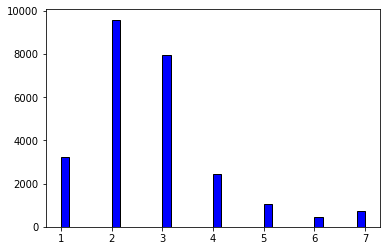

In [40]:
# Distribution of data in y training dataset
plt.hist(y_train['MARKETVAL'], bins = int(180/5), color = 'blue', edgecolor = 'black')

(array([1377.,    0.,    0.,    0.,    0.,    0., 4080.,    0.,    0.,
           0.,    0.,    0., 3422.,    0.,    0.,    0.,    0.,    0.,
        1071.,    0.,    0.,    0.,    0.,    0.,  496.,    0.,    0.,
           0.,    0.,    0.,  157.,    0.,    0.,    0.,    0.,  305.]),
 array([1.        , 1.16666667, 1.33333333, 1.5       , 1.66666667,
        1.83333333, 2.        , 2.16666667, 2.33333333, 2.5       ,
        2.66666667, 2.83333333, 3.        , 3.16666667, 3.33333333,
        3.5       , 3.66666667, 3.83333333, 4.        , 4.16666667,
        4.33333333, 4.5       , 4.66666667, 4.83333333, 5.        ,
        5.16666667, 5.33333333, 5.5       , 5.66666667, 5.83333333,
        6.        , 6.16666667, 6.33333333, 6.5       , 6.66666667,
        6.83333333, 7.        ]),
 <a list of 36 Patch objects>)

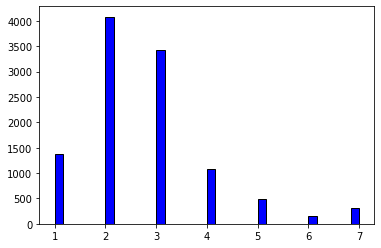

In [41]:
# Distribution of data in y testing dataset
plt.hist(y_test['MARKETVAL'], bins = int(180/5), color = 'blue', edgecolor = 'black')

In [42]:
# One Hot Encoding to represent categorical variables as binary vectors
le = LabelEncoder()
le.fit(y_train)
y_train_le = le.transform(y_train['MARKETVAL'])#.reshape(-1, 1)
#y_test_le = le.transform(y_train['MARKETVAL'])#.reshape(-1, 1)

oh = OneHotEncoder(sparse=False)
y_train_le = y_train_le.reshape(len(y_train_le), 1)
oh.fit(y_train_le)

y_train_oh = oh.transform(y_train_le)

# Performance Measures
__The below functions are used to measure the performance of each ML algorithm.__

In [43]:
# Calculating accuracy score for training and testing datasets
def accuracy(X_train, X_test, y_train, y_test, model): 
    y_pred_train = np.round(model.predict(X_train))
    train_accuracy = accuracy_score(y_train.values, y_pred_train)
    print(f"Train accuracy: {train_accuracy:0.2%}")
    
    y_pred_test = np.round(model.predict(X_test))
    test_accuracy = accuracy_score(y_test.values, y_pred_test)
    print(f"Test accuracy: {test_accuracy:0.2%}")

In [44]:
# Function to train data based on different classifiers
def train_model(X_train, X_test, classifier, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train, y_train)
    return model

# Algorithms Implemented

__Random Forest Classifier<br />__
__In order to increase test accuracy, we tried executing the algorithm using n_estimators=100, 200, 500, 1000. We finally retained the best result that we could get.__

Train accuracy: 100.00%
Test accuracy: 59.49%


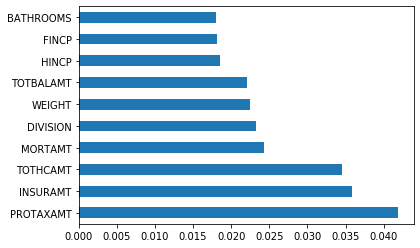

In [45]:
# Using Random Forest Classifier
model = train_model(X_train, y_train_oh, RandomForestClassifier, n_estimators=200, random_state=20, verbose=False)
accuracy(X_train, X_test, y_train, y_test, model)
# Top 10 features that determine price
pd.Series(model.feature_importances_, x.columns).sort_values(ascending=True).nlargest(10).plot.barh(align='center')

__The above bar graph shows which features are the most important in predicting price range of houses.__

__k-Nearest Neighbor Classifier<br />__
__For the kNN algorithm, we modified the value for n_neighbors=3,4,5,6,7,8,9,10 and finally retained the value that would give us best test accuracy.__

In [46]:
# Using kNN Classifier
model = train_model(X_train, y_train, KNeighborsClassifier, n_neighbors=7)
accuracy(X_train, X_test, y_train, y_test, model)

Train accuracy: 60.19%
Test accuracy: 47.36%


__Decision Tree Classifier<br />__
__We changed the values for max_depth=2,3,4,5,6,7,8,9,10,20 to finally select the best test accuracy result for Decision Tree.__

In [47]:
# Using Decision Tree Classifier
model = train_model(X_train, y_train, DecisionTreeClassifier, max_depth=8)
accuracy(X_train, X_test, y_train, y_test, model)

Train accuracy: 65.08%
Test accuracy: 60.60%


__Multi-layer Perceptron Classifier<br />__
__We tried different values for alpha, max_iter and solver to get the best accuracy results.__

In [48]:
mlp = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(610, 100, 75, 35, 15), learning_rate='constant', learning_rate_init=0.001, max_iter=500, momentum=0.1, n_iter_no_change=20, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)
mlp.fit(X_train, y_train)
accuracy(X_train, X_test, y_train, y_test, mlp)

Train accuracy: 37.65%
Test accuracy: 37.40%


__AdaBoost Classifier<br />__
__For AdaBoostClassifier, we used n_estimators=20,50,70,100,300,500,1000, max_depth=3,4,5,7,8,20,15,20, learning_rate=0.1,0.3,0.5,0.01,0.08,0.003. Finally I got below best accuracy values.__

In [49]:
abc = AdaBoostClassifier(n_estimators=50, base_estimator= DecisionTreeClassifier(max_depth=8),learning_rate=0.01)
abc = abc.fit(X_train, y_train)
accuracy(X_train, X_test, y_train, y_test, abc)

Train accuracy: 73.54%
Test accuracy: 61.29%


__Ensemble Method (Stacking)<br />__
__We used DecisionTreeClassifier, RandomForestClassifier, MLPClassifier and KNeighborsClassifier for Stacking method here.__

In [50]:
# Dataset Split
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=0)

In [51]:
# Decision Tree Classifier
model1 = DecisionTreeClassifier()
model1.fit(X_train_v, y_train_v)
val_pred1=model1.predict(X_val)
test_pred1=model1.predict(X_test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)

# Random Forest Classifier
model2 = RandomForestClassifier()
model2.fit(X_train_v,y_train_v)
val_pred2=model2.predict(X_val)
test_pred2=model2.predict(X_test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)

# MLP Classifier
model3 = mlp
model3.fit(X_train_v,y_train_v)
val_pred3=model3.predict(X_val)
test_pred3=model3.predict(X_test)
val_pred3=pd.DataFrame(val_pred3)
test_pred3=pd.DataFrame(test_pred3)

# k-Nearest Neighbor Classifier
model4 = KNeighborsClassifier()
model4.fit(X_train_v,y_train_v)
val_pred4=model4.predict(X_val)
test_pred4=model4.predict(X_test)
val_pred4=pd.DataFrame(val_pred4)
test_pred4=pd.DataFrame(test_pred4)

In [52]:
df_val=pd.concat([X_val, val_pred1.reindex_like(X_val), val_pred2.reindex_like(X_val), val_pred3.reindex_like(X_val), val_pred4.reindex_like(X_val)], axis=1, sort=False)
df_test=pd.concat([X_test, test_pred1.reindex_like(X_test), test_pred2.reindex_like(X_test), test_pred3.reindex_like(X_test), test_pred4.reindex_like(X_test)], axis =1)

df_val.dropna(axis='columns', inplace=True)
df_test.dropna(axis='columns', inplace=True)

# Getting the test accuracy score for Stacking
model = LogisticRegression()
model.fit(df_val,y_val)
model.score(df_test,y_test)

0.43436010267693437

# Result
__The results from all the above algorithms are as mentioned below:<br />__
<br />
__RANDOM FOREST CLASSIFIER:<br />__
__Train Accuracy - 100.00%<br />__
__Test Accuracy - 59.49%<br />__
<br />
__k-NEAREST NEIGHBOR CLASSIFIER:<br />__
__Train Accuracy - 60.19%<br />__
__Test Accuracy - 47.36%<br />__
<br />
__DECISION TREE CLASSIFIER:<br />__
__Train Accuracy - 65.08%<br />__
__Test Accuracy - 60.53%<br />__
<br />
__MULTI-LAYER PERCEPTRON CLASSIFIER:<br />__
__Train Accuracy - 37.65%<br />__
__Test Accuracy - 37.40%<br />__
<br />
__ADABOOST CLASSIFIER:<br />__
__Train Accuracy - 73.54%<br />__
__Test Accuracy - 61.29%<br />__
<br />
__ENSEMBLE METHOD (STACKING):<br />__
__Accuracy Score - 0.43436010267693437<br />__

# Conclusion
__We explored a range of different models, from relatively simple to more complex ones, with the goal of best predicting home price ranges but also utilizing different data science skills in the process. For this particular problem, the algorithm with best accuracy value is AdaBoost Classifier with test accuracy score of 61.29% and therefore it can be considered as a good classifier algorithm for house price range prediction problem. The Decision Tree Classifier is close enough with 60.60% accuracy score. We have tried tuning each algorithm with different hyper-parameter values and finally kept the best results for each, thereby attaining hyper-parameter optimization.<br />__
<br />
__Github Repository :<br />__
__Google Drive :__